# Shop Data Analysis

In [35]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
# import csv file
df=pd.read_csv("Shop Sales Data.csv")

In [39]:
df.shape

(11251, 15)

In [41]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [45]:
#drop unrelated columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [47]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [49]:
# drop null values
df.dropna(inplace=True)

In [51]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [53]:
df['Amount'].dtypes

dtype('int32')

In [60]:
Amt_avg = df["Amount"].mean()
Amt_avg

9453.610552540262

In [62]:
Amt_avg_int=int(Amt_avg)
Amt_avg_int

9453

In [64]:
df["Amount"] = df["Amount"].fillna(Amt_avg_int)

In [66]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [55]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratory Data Analysis

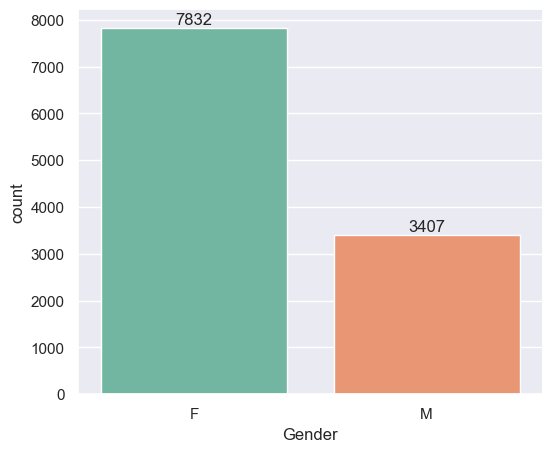

In [128]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df,hue = 'Gender',palette = 'Set2')
for bars in ax.containers:
    ax.bar_label(bars)

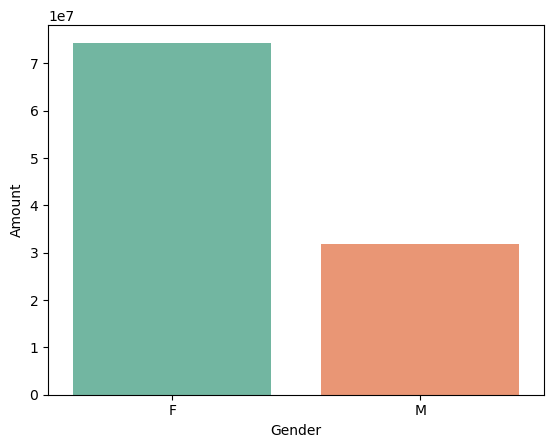

In [72]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

a=sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,hue = 'Gender',palette = 'Set2')


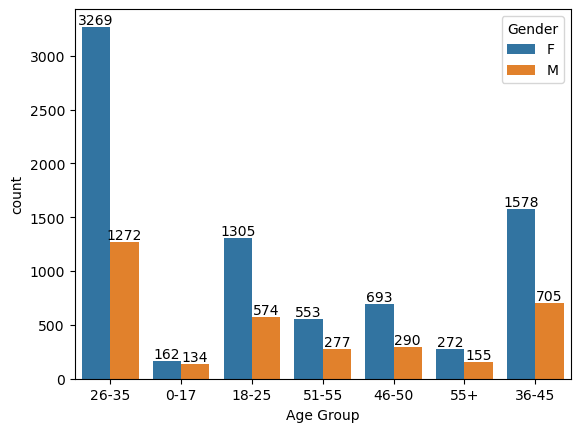

In [78]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

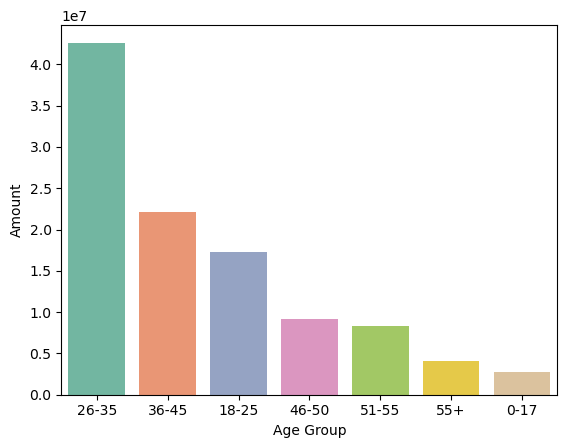

In [82]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,hue = 'Age Group',palette = 'Set2')

<Axes: xlabel='State', ylabel='Orders'>

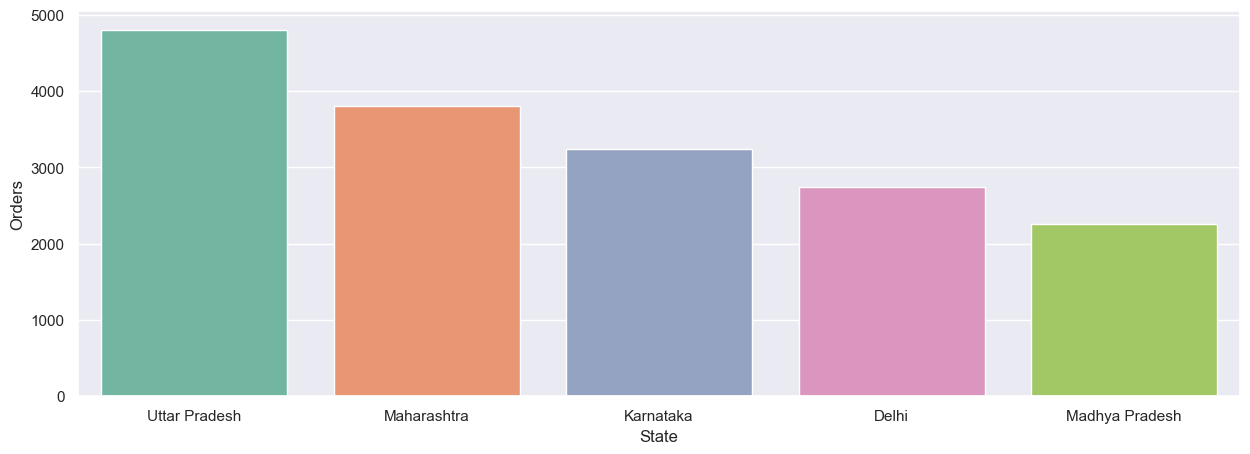

In [84]:
# total number of orders from top 5 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue='State',palette="Set2")

<Axes: xlabel='State', ylabel='Amount'>

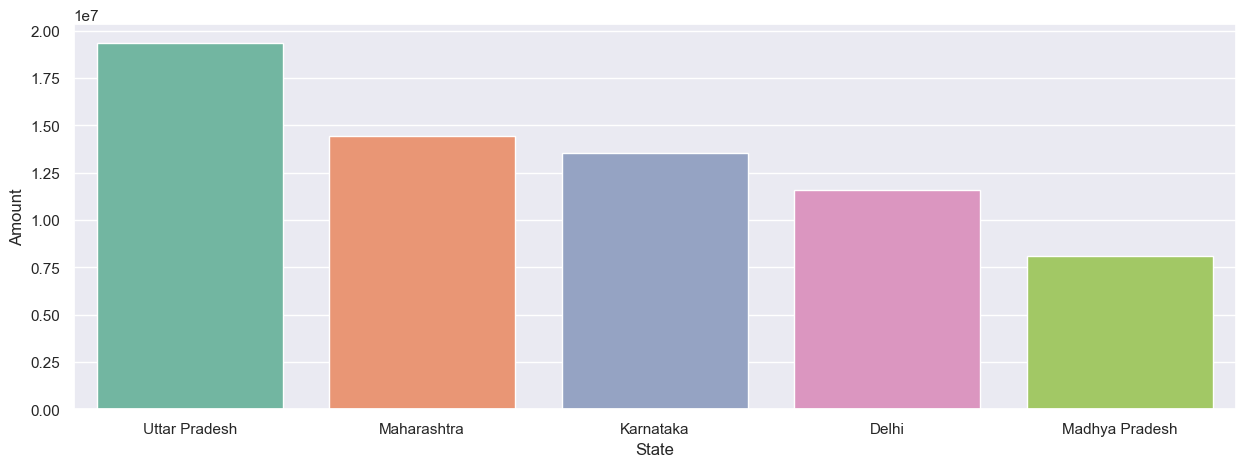

In [86]:
# total amount/sales from top 5 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State',palette="Set2")

<Axes: xlabel='Occupation', ylabel='Amount'>

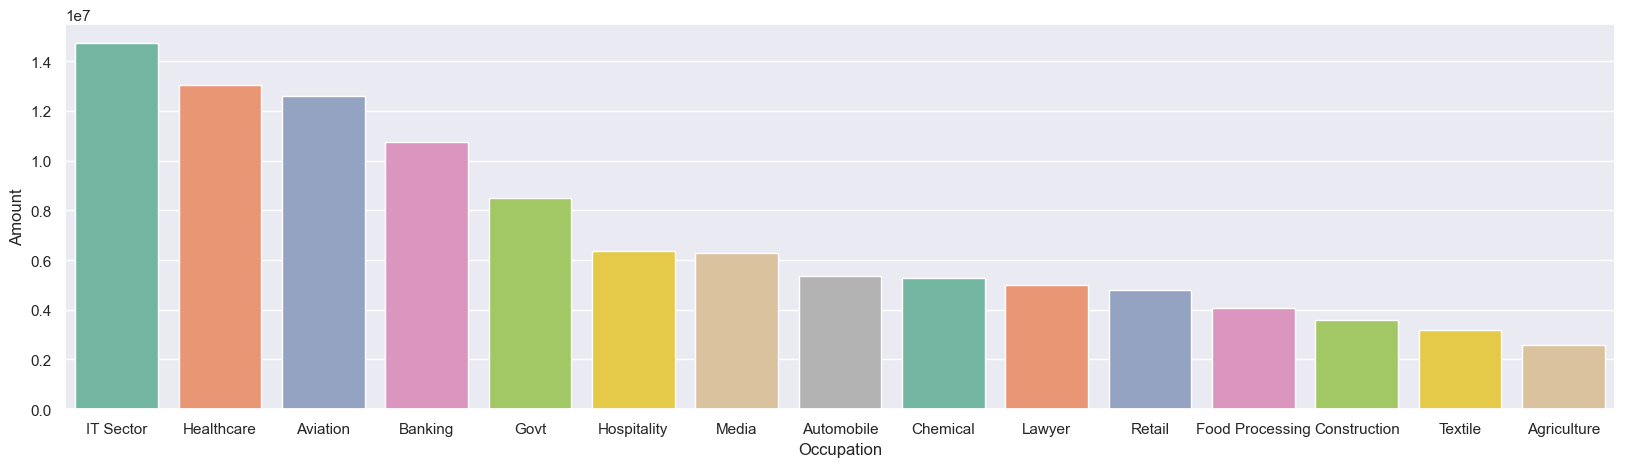

In [108]:
#the total 'Amount' for each occupation

sales_by_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_by_occupation, x = 'Occupation',y= 'Amount',hue='Occupation',palette="Set2")

<Axes: xlabel='Product_Category', ylabel='Amount'>

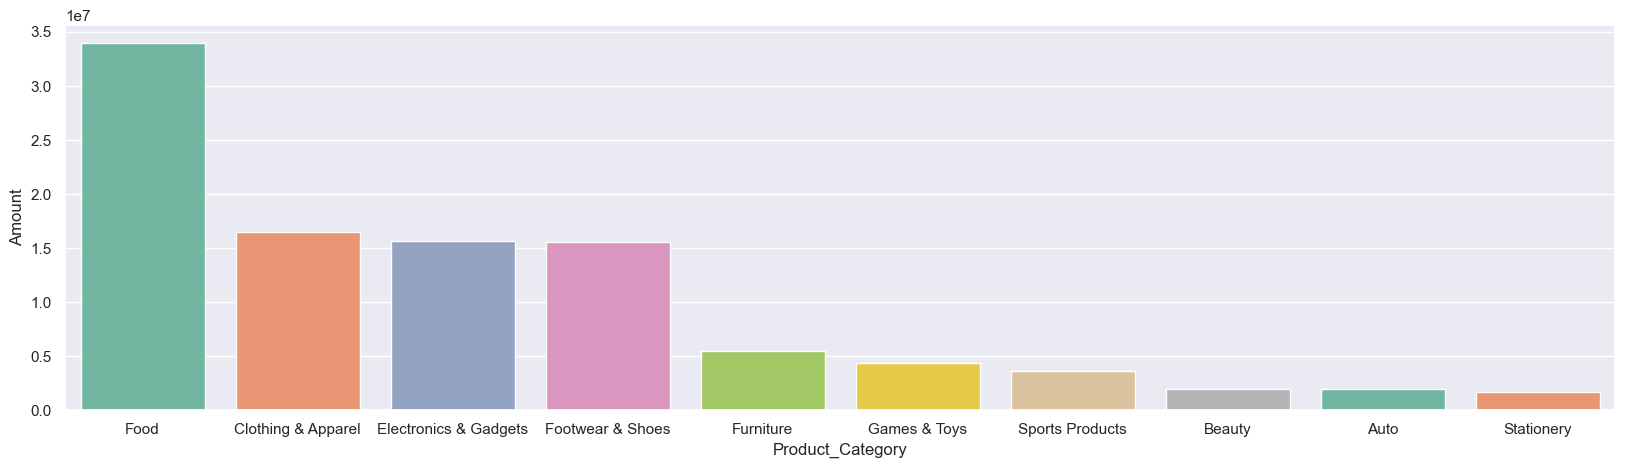

In [116]:
#the total 'Amount' for each Product_Category
sales_by_products = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_by_products, x = 'Product_Category',y= 'Amount',hue='Product_Category',palette="Set2")

# CONCLUSION:

 ## "Women aged 26-35 from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation, are more likely to buy products from the Food, Clothing, and Electronics categories."